In [50]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df = pd.read_csv('./ml-20m/ratings.csv', sep=',', header = 0)
movie_titles =  pd.read_csv('./ml-20m/movies.csv', sep =',')
movie_data =  pd.merge(df, movie_titles, on='movieId')

In [16]:
movie_data.describe()

,userId,movieId,rating,timestamp
count,2.000026e+07,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00,1.100918e+09
std,4.003863e+04,1.978948e+04,1.051989e+00,1.621694e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,3.439500e+04,9.020000e+02,3.000000e+00,9.667977e+08
50%,6.914100e+04,2.167000e+03,3.500000e+00,1.103556e+09
75%,1.036370e+05,4.770000e+03,4.000000e+00,1.225642e+09
max,1.384930e+05,1.312620e+05,5.000000e+00,1.427784e+09


In [15]:
rating_mean_count = movie_data.groupby('title')['rating'].mean().sort_values(ascending=False).head() 

title
Stealing a Nation (2004)                                 5.0
Human Behavior Experiments, The (2006)                   5.0
Boys Diving, Honolulu (1901)                             5.0
Rigoletto (1993)                                         5.0
Paying the Price: Killing the Children of Iraq (2000)    5.0
Name: rating, dtype: float64

In [14]:
movie_data.groupby('title')['rating'].count().sort_values(ascending=False).head() 

title
Pulp Fiction (1994)                 67310
Forrest Gump (1994)                 66172
Shawshank Redemption, The (1994)    63366
Silence of the Lambs, The (1991)    63299
Jurassic Park (1993)                59715
Name: rating, dtype: int64

In [19]:
ratings_mean_count = pd.DataFrame(movie_data.groupby('title')['rating'].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(movie_data.groupby('title')['rating'].count())

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

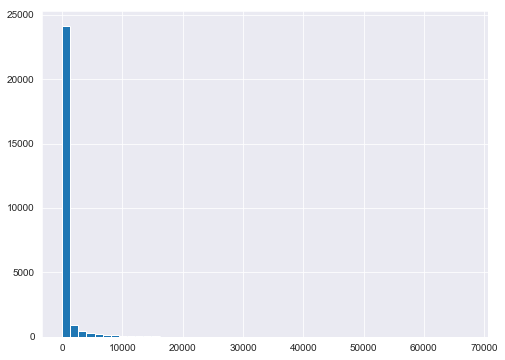

In [22]:
plt.figure(figsize=(8,6))  
plt.rcParams['patch.force_edgecolor'] = True  
ratings_mean_count['rating_counts'].hist(bins=50)  

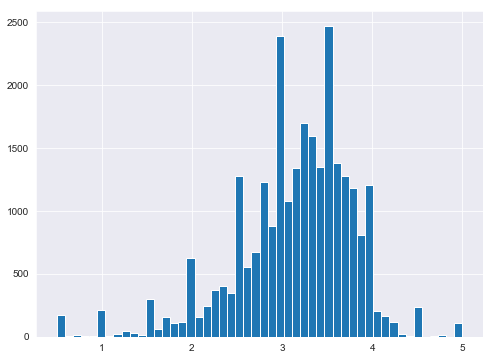

In [23]:
plt.figure(figsize=(8,6))  
plt.rcParams['patch.force_edgecolor'] = True  
ratings_mean_count['rating'].hist(bins=50)  

<Figure size 576x432 with 0 Axes>

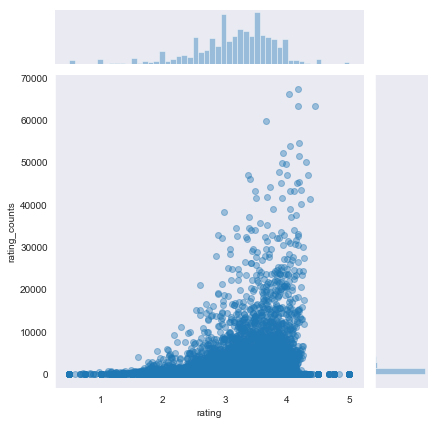

In [24]:
plt.figure(figsize=(8,6))  
plt.rcParams['patch.force_edgecolor'] = True  
sns.jointplot(x='rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)  

In [47]:
from datetime import datetime
import os
import scipy.sparse as sparse
import statsmodels.stats.correlation_tools as corr

In [39]:
movie_data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,1112486027,Jumanji (1995),Adventure|Children|Fantasy
1,5,2,3.0,851527569,Jumanji (1995),Adventure|Children|Fantasy
2,13,2,3.0,849082742,Jumanji (1995),Adventure|Children|Fantasy
3,29,2,3.0,835562174,Jumanji (1995),Adventure|Children|Fantasy
4,34,2,3.0,846509384,Jumanji (1995),Adventure|Children|Fantasy


In [45]:
start = datetime.now()
if os.path.isfile('sparse_matrix.npz'):
    print('UserId - Title matrix already available at disk, loading from there..')
    user_movie_rating = sparse.load_npz('sparse_matrix.npz')
    print('Done..')
else:
    print('Creating sparse matrix..')
    user_movie_rating = sparse.csr_matrix((movie_data['rating'],(movie_data['userId'],movie_data['movieId']),))
print(datetime.now()-start)

Creating sparse matrix..
0:00:02.133402


In [59]:
u,z = user_movie_rating.shape
(1-(user_movie_rating.count_nonzero()/(u*z))*100)

0.8899823353240743